# 一、Tensorflow与深度学习笔记 

- **Author:**currydai
- **Date:**4/3/2021 

## 目录

01. 人工智能简介
02. 回归问题
03. 分类问题
04. tensorflow基础
05. tensorflow进阶
06. 神经网络
07. 反向传播算法
08. Keras高级接口
09. 过拟合
10. 卷积神经网络
11. 循环神经网络
12. 自编码器
13. 生成对抗网络
14. 强化学习
15. 自定义数据集 

## 前述

深度学习相对与其他常规机器学习以及数值优化算法规模更大，主要体现在深层次的复杂网络导致前后向的计算复杂。不过不用过度担心或者惧怕，很多机构已经基于软硬件系统开发出最优的计算框架，例如Tensorflow or Pytorch，我们可以很方便的使用它们。


然而在使用的过程中，我发现，由于框架太过简单，造成知识的退化。很多底层的原理一知半解，导致在实现各种模型时理解不到位。因此本文基于这种考虑，从原理公式结合tensorflow实现原理出发，深入理解深度学习相关模型与实现方法。

$$公式+原理+代码$$  

## 1.人工智能绪论 

定义： 人工智能是让机器获得像人类一样具有思考和推理机制的智能技术

发展：人工智能的发展主要经历过三个阶段，每个阶段都代表了人们从不同的角度尝试实现人工智能的探索足迹

$$推理期->机器学习->神经网络$$

### 1.1 机器学习

**机器学习分类：**
- 有监督学习 Supervised Learning
- 无监督学习 Unsupervised Learning
- 强化学习 Reinforcrment Learning

- **有监督学习** 有监督学习的数据集包含了样本𝒙与样本的标签𝒚，算法模型需要学习到
映射关系𝑓𝜃: 𝒙 → 𝒚，其中𝑓𝜃代表模型函数，𝜃为模型的参数。在训练时，通过计算模型的预
测值𝑓𝜃(𝒙)与真实标签𝒚之间的误差来优化网络参数𝜃，使得网络下一次能够预测更精准。常
见的有监督学习有线性回归、逻辑回归、支持向量机、随机森林等。

- **无监督学习** 收集带标签的数据往往代价较为昂贵，对于只有样本𝒙的数据集，算法需
要自行发现数据的模态，这种方式叫作无监督学习。无监督学习中有一类算法将自身作为
监督信号，即模型需要学习的映射为𝑓𝜃: 𝒙 → 𝒙，称为自监督学习(Self-supervised 
Learning)。在训练时，通过计算模型的预测值𝑓𝜃(𝒙)与自身𝒙之间的误差来优化网络参数𝜃。
常见的无监督学习算法有自编码器、生成对抗网络等。

- **强化学习** 也称为增强学习，通过与环境进行交互来学习解决问题的策略的一类算法。
与有监督、无监督学习不同，强化学习问题并没有明确的“正确的”动作监督信号，算法
需要与环境进行交互，获取环境反馈的滞后的奖励信号，因此并不能通过计算动作与“正
确动作”之间的误差来优化网络。常见的强化学习算法有 DQN，PPO 等。

Tips：后续会有专门的课程区去介绍机器学习的理论、算法与应用，在这里就不展开扩展

### 1.2神经网络与深度学习发展

- 神经网络：一类基于神经网络从数据中学习的算法
- 深度学习：将利用深层神经网络实现的算法

2006 年以前，深度学习以神经网络和连接主义名义发展，历经了两次兴盛和两次
寒冬

2006 年，Geoffrey Hinton 首次将深层神经网络命名为深度学习，自此开启了深度学
习的第三次复兴之路。

**浅层神经网络伴随着机器学习的发展逐渐成熟** 

**1943-1969年为人工智能发展的第一次兴盛期**
- 1943 神经元模型
- 1950 图灵测试
- 1958 感知机模型 

**1982-1995年第二次人工智能复兴的大潮**
- 1969 XOR异或问题
- 1974 反向传播算法
- 1982 Hopfield网络
- 1985 Boltzmann机器
- 1986 受限Boltzmann MLP RNN
- 1990 LeNet 

**2006-至今第三次人工智能的复兴**
- 1997 LSTM
- 2006 DBN深度置信网络

深度学习逐渐取代浅层神经网络，成为第三次人工智能的热点，并且在2012开启了深度学习的新纪元

- 2009 ImageNet
- 2012 AlexNet
- 2014 GAN生成对抗网络
- 2014 VGG GoogLeNet
- 2015 ResNet
- 2015 DQN
- 2015 Batch Normalization
- 2015 TensorFlow发布
- 2016 AlphaGo
- 2017 AlphaGo Zero
- 2018 BERT机器翻译
- 2019 Pluribus德州扑克
- 2019 OpenAI Five
- 2019 TensorFlow2.0发布 

### 1.3 深度学习的特点

#### 数据量

- 1936 Iris:150样本
- 1998 MNIST：70000样本
- 2010 ImageNet:14197122 11400万样本
- 总之，数据量在逐渐增大

#### 计算力

x86 CPU 的曲线变化相对缓慢，而 NVIDIA GPU的浮点计算能力指数式增长，这主要是由日益增长的游戏计算量和深度学习计算量等业务驱动的。

#### 网络规模

- AlexNet：8层
- VCG16：16层
- GoogLeNet:22层
- ResNet50：50层
- DenseNet121：121层

网络的总参数量可达到千万级别

Tips:成年人大脑中包含了约 1000 亿个神经元，每个神经元通过树突获取输入信号，通过轴
突传递输出信号，神经元之间相互连接构成了巨大的神经网络，从而形成了人脑的感知和
意识基础

#### 通用智能

- 依靠人工设计的特征和先验设定无法自适应新场景，模型通用性不强。
- 深度学习端对端进行训练，适应性强

Ex.DeepMind设计的DNQ算法可以在相同的算法、模型结构和参数情况下，在49个游戏获得人类相当的游戏水平，通用性很强

### 1.4深度学习应用场景

#### 计算机视觉

- 图片识别
- 目标检测
- 语义分割
- 视频理解
- 图片生成

- 艺术风格迁移
- 超分辨率
- 图片去噪/去雾
- 灰度图片着色

图片识别(Image Classification) 是常见的分类问题。神经网络的输入为图片数据，输出
值为当前样本属于每个类别的概率分布。通常选取概率值最大的类别作为样本的预测类
别。图片识别是最早成功应用深度学习的任务之一，经典的网络模型有 VGG 系列、
Inception 系列、ResNet 系列等。

目标检测(Object Detection) 是指通过算法自动检测出图片中常见物体的大致位置，通
常用边界框(Bounding box)表示，并分类出边界框中物体的类别信息。常
见的目标检测算法有 RCNN、Fast RCNN、Faster RCNN、Mask RCNN、SSD、YOLO 系列
等。

语义分割(Semantic Segmentation) 是通过算法自动分割并识别出图片中的内容，可以
将语义分割理解为每个像素点的分类问题，分析每个像素点的物体的类别信息，如图 1.16
所示。常见的语义分割模型有 FCN、U-net、SegNet、DeepLab 系列等。

视频理解(Video Understanding) 随着深度学习在 2D 图片的相关任务上取得较好的效
果，具有时间维度信息的 3D 视频理解任务受到越来越多的关注。常见的视频理解任务有
视频分类、行为检测、视频主体抽取等。常用的模型有 C3D、TSN、DOVF、TS_LSTM
等。


图片生成(Image Generation) 通过学习真实图片的分布，并从学习到的分布中采样而获
得逼真度较高的生成图片。目前常见的生成模型有 VAE 系列、GAN 系列等。其中 GAN 系
列算法近年来取得了巨大的进展，最新 GAN 模型产生的图片效果达到了肉眼难辨真伪的
程度

#### 自然语言处理 

机器翻译(Machine Translation) 过去的机器翻译算法通常是基于统计机器翻译模型，这
也是 2016 年前 Google 翻译系统采用的技术。2016 年 11 月，Google 基于 Seq2Seq 模型上
线了 Google 神经机器翻译系统(GNMT)，首次实现了源语言到目标语言的直译技术，在多
项任务上获得了 50~90%的效果提升。常用的机器翻译模型有 Seq2Seq、BERT、GPT、
GPT-2 等，其中 OpenAI 提出的 GPT-2 模型参数量高达 15 亿个，甚至发布之初以技术安全
考虑为由拒绝开源 GPT-2 模型。


聊天机器人(Chatbot) 聊天机器人也是自然语言处理的一项主流任务，机器自动学习与
人类对话，对于人类的简单诉求提供满意的自动回复，提高客户的服务效率和服务质量
等。常用在咨询服务、娱乐系统、智能家居

#### 强化学习

虚拟游戏 相对于真实环境，虚拟游戏平台既可以训练、测试强化学习算法，又可以避
免无关因素干扰，同时也能将实验代价降到最低。目前常用的虚拟游戏平台有 OpenAI 
Gym、OpenAI Universe、OpenAI Roboschool、DeepMind OpenSpiel、MuJoCo 等，常用的
强化学习算法有 DQN、A3C、A2C、PPO 等。在围棋领域，DeepMind AlaphGo 程序已经
超越人类围棋专家；在 Dota2 和星际争霸游戏上，OpenAI 和 DeepMind 开发的智能程序也
在限制规则下战胜了职业队伍。


机器人(Robotics) 在真实环境中，机器人的控制也取得了一定的进展。如 UC Berkeley
实验室在机器人领域的 Imitation Learning、Meta Learning、Few-shot Learning 等方向上取得
了不少进展。美国波士顿动力公司在机器人应用中取得喜人的成就，其制造的机器人在复
杂地形行走、多智能体协作等任务上表现良好。 


自动驾驶(Autonomous Driving) 被认为是强化学习短期内能技术落地的一个应用方
向，很多公司投入大量资源在自动驾驶上，如百度、Uber、Google 无人车等，其中百度的
无人巴士“阿波龙”已经在北京、雄安、武汉等地展开试运营。

#### 商业智能(BI)

为提高企业经营绩效而采用的一系列方法、技术和软件的总和。通常被理解为将企业中的现有数据转换为知识并帮助企业做出明智的业务决策的工具。

## 2.回归问题 

- 回归问题：对样本集合$D=(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),……,(x^{(n)},y^{(n)})$ ，寻找一条最好的曲线，使它尽可能让所有采样点到该曲线的误差最小。
- 优化方法：$$w^*,b^*=argmin_{w,b}{\frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}$$

梯度下降算法(Gradient Descent)是神经网络训练中最常用的优化算法，配合
强大的图形处理芯片 GPU(Graphics Processing Unit)的并行加速能力，非常适合优化海量数
据的神经网络模型，自然也适合优化我们这里的神经元线性模型。这里先简单地应用梯度
下降算法，用于解决神经元模型预测的问题。由于梯度下降算法是深度学习的核心算法，
我们将在第 7 章非常详尽地推导梯度下降算法在神经网络中的应用，这里先给读者第一印
象。

**Question 2.1:在机器学习算法中为什么经常求导数？**

Ans:

$$f(x)=x^2*sin(x)$$

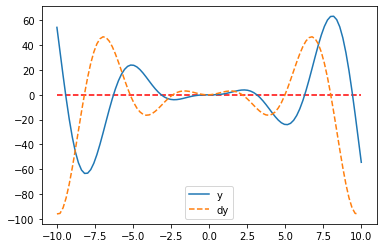

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-10,10,100)
y=x**2*np.sin(x) 

dy=np.diff(y)/np.diff(x)

plt.figure()
plt.plot(x,y) 
plt.plot(x[0:len(x)-1],dy,'--') 
plt.hlines(0,-10,10,linestyles='--',colors='r')
plt.legend(['y','dy'])
plt.show() 

从上图可以看到，蓝色是$f(x)$波形，橙色是其导数$dy$的波形，红色是零刻度线。原始波形的极值点都是其导数的零点，因此在我们求解极值点可以通过求解导数的零点

因此在对损失函数求解最小值的过程中，我们就可以不断进行更新参数，每次确保都达到极值。

$$f(x,y)=-(cos^2(x)+cos^2(y))^2$$

$$df(x,y)/dx=-2*(cos^2(x)+cos^2(y))*(-2*cos(x)*sin(x))$$ 
$$df(x,y)/dy=-2*(cos^2(x)+cos^2(y))*(-2*cos(y)*sin(y))$$ 

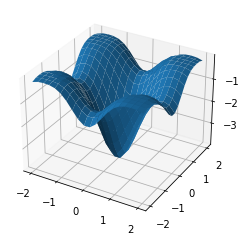

In [2]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
from sympy import *

x=np.linspace(-2,2,20)
y=np.linspace(-2,2,20) 
z=-(np.cos(x)**2+np.cos(y)**2)**2

#x_s, y_s = symbols('x, y')
#dx = diff(z, x_s) 
#dy = diff(z, y_s)

X,Y=np.meshgrid(x,y)  
Z=-(np.cos(X)**2+np.cos(Y)**2)**2  

fig = plt.figure() 
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)   
plt.show()  

### 基于梯度下降 线性模型实战

在介绍了用于优化𝑤和𝑏的梯度下降算法后，我们来实战训练单输入神经元线性模型。
首先我们需要采样自真实模型的多组数据，对于已知真实模型的玩具样例(Toy Example)，
我们直接从指定的𝑤 = 1. , 𝑏 = . 的真实模型中直接采样：

$$y=1.477x+0.089$$ 

- 采样数据

为了能够很好地模拟真实样本的观测误差，我们给模型添加误差自变量𝜖，它采样自均
值为 0，标准差为 0.01 的高斯分布：

In [3]:
data=[]
for i in range(100):
    x=np.random.uniform(-10,10)
    eps=np.random.normal(0,0.01)
    
    y=1.477*x+0.089+eps
    
    data.append([x,y])
    
data=np.array(data) 

**计算误差**

总体误差是每个样本点的误差累计，我们误差用均方根误差：
$$L={\frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}$$

In [4]:
def mse(w,b,points):
    totalError=0
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1] 
        totalError=totalError+(y-w*x-b)**2
    return totalError/float(len(points))

**计算梯度**

梯度指示我们如何快速准确进行参数更新，向损失函数最小的方向前进。

梯度下降需要我们在一组$(w,b)$下，计算出函数在每一个点$(x_i,y_i)$上的梯度信息从而求解出整体的平均梯度信息：$(\frac {\partial L}{\partial w},\frac {\partial L}{\partial b})$ 

$$\frac {\partial L}{\partial w}=\frac {{\partial \frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}}{\partial w}={\frac {2}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})\cdot x^{(i)}}}}$$

$$\frac {\partial L}{\partial b}=\frac {{\partial \frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}}{\partial b}={\frac {2}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})}}}$$

$$w_{new}=w_{current}-Ir*\frac {\partial L}{\partial w}$$

$$b_{new}=b_{current}-Ir*\frac {\partial L}{\partial b}$$ 


因此我们只需要计算在每一个点上面的(𝑤𝑥
(𝑖) + 𝑏 − 𝑦
(𝑖)
) ∙
𝑥
(𝑖)和(𝑤𝑥
(𝑖) + 𝑏 − 𝑦
(𝑖)
)值，平均后即可得到偏导数 

In [5]:
def step_gradient(w,b,points,lr):
    
    w_gradient=0
    b_gradient=0
    M=float(len(points))
    
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1] 
                
        w_gradient=w_gradient+(2/M)*x*(w*x+b-y)
        b_gradient=b_gradient+(2/M)*(w*x+b-y)
        
    new_w=w-(Ir*w_gradient)
    new_b=b-(Ir*b_gradient)
    
    return [new_w,new_b] 

**梯度更新** 

在计算出误差函数在w和b的梯度后，结合学习速度更新w和b的值。我们把对数据集的所有样本训练一次成为一个Epoch，共循环迭代num_iterations个Epoch。

In [6]:
def gradient_descent(points,starting_w,starting_b,Ir,num_iterations):
    
    w=starting_w
    b=starting_b
    
    LOSS=[]
    for step in range(num_iterations):
        
        w,b=step_gradient(w,b,points,Ir)
        loss=mse(w,b,points)
        LOSS.append(loss)
        if(step%50==0):
            print("iteration:%s,loss:%s,w:%s,b:%s"%(step,loss,w,b)) 
            
    ax=plt.subplot(1,1,1)
    ax.plot(LOSS)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('LOSS')
    plt.show() 
    return [w,b] 

**主函数**

iteration:0,loss:7.758123678377829,w:0.9927039002873065,b:-0.03773451133649564
iteration:50,loss:0.003092355275865898,w:1.4748955895708002,b:0.03261852515541318
iteration:100,loss:0.0005367695942329155,w:1.4763098159135961,b:0.06723456557442425
iteration:150,loss:0.00015789172955616107,w:1.4768543477999951,b:0.08056308111583495
iteration:200,loss:0.00010172126445545936,w:1.4770640136549804,b:0.08569507554348363
iteration:250,loss:9.339372293407628e-05,w:1.4771447431252736,b:0.08767109205661962
iteration:300,loss:9.215912486432427e-05,w:1.4771758270963584,b:0.08843193490538606
iteration:350,loss:9.197608976447885e-05,w:1.4771877956284805,b:0.08872488885423767
iteration:400,loss:9.194895393088518e-05,w:1.477192403976647,b:0.08883768746473507
iteration:450,loss:9.19449309130844e-05,w:1.4771941783690792,b:0.08888111929618846
iteration:500,loss:9.194433448135223e-05,w:1.4771948615788522,b:0.08889784223253573
iteration:550,loss:9.194424605747958e-05,w:1.4771951246410617,b:0.088904281210371
i

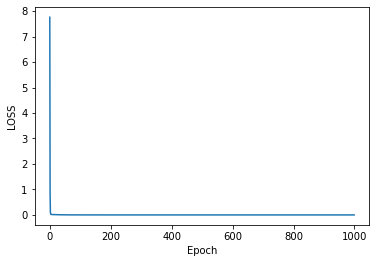

Final loss:71.99843090222419, w:0.08890831200987064, b:1.4771952893179792


In [7]:
Ir=0.01
initial_b=0
initial_w=0
num_iterations=1000
[b,w]=gradient_descent(data,initial_w,initial_b,Ir,num_iterations) 
loss = mse(w, b, data)
print(f'Final loss:{loss}, w:{w}, b:{b}')

简单回顾一下我们的探索之路：首先假设𝑛个输入的生物神经元的数学模型为线性模
型之后，只采样𝑛 + 1个数据点就可以估计线性模型的参数𝒘和𝑏。引入观测误差后，通过
梯度下降算法，我们可以采样多组数据点循环优化得到𝒘和𝑏的数值解。

对于预测值是连续的实数范围，或
者属于某一段连续的实数区间，我们把这种问题称为回归(Regression)问题。特别地，如果
使用线性模型去逼近真实模型，那么我们把这一类方法叫做线性回归(Linear Regression，
简称 LR)，线性回归是回归问题中的一种具体的实现。

## 3.分类问题

我们将以数字图片识别为例，探索如何用机器学习的方法去解决这个问题。

MNIST:60000+10000，28*28，灰度值

In [8]:
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers,optimizers,datasets

In [9]:
(x,y),(x_val,y_val)=datasets.mnist.load_data()  
x_input=2*tf.convert_to_tensor(x,dtype=tf.float32)/255-1
y_output=tf.one_hot(y,depth=10)
print(x_input.shape)
print(y_output.shape) 

(60000, 28, 28)
(60000, 10)


In [10]:
train_dataset=tf.data.Dataset.from_tensor_slices((x_input,y_output))
train_dataset=train_dataset.batch(512)

每一张图片的计算流程是通用的，我们在计算的过程中可以一次进行多张图片的计算，充分利用 CPU 或 GPU 的并行计算能力。我们用形状为[ℎ, 𝑤]的矩阵来表示一张图片，对于多张图片来说，我们在前面添加一个**数量维度(Dimension)**，使用形状为[𝑏, ℎ, 𝑤]的张量来表示，其中𝑏代表了批量(Batch Size)；多张彩色图片可以使用形状为[𝑏, ℎ, 𝑤, 𝑐]的张量来表示，其中**𝑐表示通道数量**(Channel)，彩色图片𝑐 = 3。**通过 TensorFlow 的 Dataset 对象可以方便完成模型的批量训练，只需要调用 batch()函数即可构建带 batch 功能的数据集对象**  

### 3.1 基础知识

在真正介绍应用之前，首先介绍一些神经网络的基础知识

**非线性模型：激活函数**


- Sigmoid函数

$$f(x)=\frac {1}{1+e^{-z}}$$

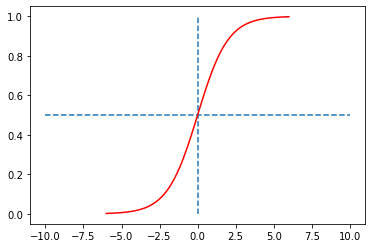

In [11]:
z=np.linspace(-6,6,100)
y=1/(1+np.exp(-(z)))
ax=plt.subplot(111)
ax.plot(z,y,'r')
plt.vlines(0,0,1,linestyles='--')
plt.hlines(0.5,-10,10,linestyles='--')
plt.show() 

- Rule函数

$$f(x)=\begin{cases}
0& \text{x<0}\\
x& \text{x>0}
\end{cases}$$ 

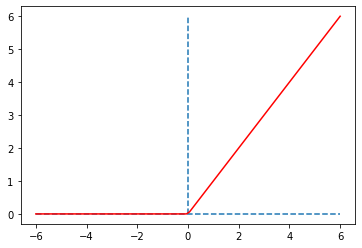

In [12]:
z=np.linspace(-6,6,100)
y=[]
for i in z:
    if(i<0):
        y.append(0)
    else:
        y.append(i)
y=np.array(y)
ax=plt.subplot(111)
ax.plot(z,y,'r')
plt.vlines(0,0,6,linestyles='--')
plt.hlines(0,-6,6,linestyles='--')
plt.show()  

ReLU 函数非常简单，在𝑦 = 𝑥的基础上面截去了𝑥 < 0的部分，可以直观地理解为
ReLU 函数仅保留正的输入部份，清零负的输入，具有单边抑制特性。虽然简单，ReLU 函
数却有优良的非线性特性，而且梯度计算简单，训练稳定，是深度学习模型使用最广泛的
激活函数之一。

**表达能力**

针对于模型的表达能力偏弱的问题，可以通过重复堆叠多次变换来增加其表达能力

**优化方法**

对于仅一层的网络模型，如线性回归的模型，我们可以直接推导出𝜕ℒ𝜕𝑤和𝜕ℒ𝜕𝑏的偏导数表
达式，然后直接计算每一步的梯度，根据梯度更新法则循环更新𝑤和𝑏参数即可。但是，当
网络层数增加、数据特征长度增大以及添加复杂的非线性函数之后，模型的表达式将变得
非常复杂，很难手动推导出模型和梯度的计算公式。而且一旦网络结构发生变动，网络的
模型函数也随之发生改变，依赖手动计算梯度的方式显然不可行。

这个时候就是深度学习框架发明的意义所在，借助于自动求导(Autograd)技术，深度学习框架在计算神经网络每层的输出以及损失函数的过程中，会构建神经网络的计算图模型，并自动完成任意参数𝜃的偏导数𝜕ℒ𝜕𝜃的计算，用户只需要搭建出网络结构，梯度将自动完成计算和更新，使用起来非常便捷高效。

### 3.2手写数字初体验

对于第一层模型来说，它接受的输入$𝒙 ∈ 𝑅^{784}$，输出$𝒉1 ∈ 𝑅^{256}$设计为长度为 256 的向量，我们不需要显式地编写$𝒉1 = ReLU(𝑾_1𝒙 + 𝒃_1)$的计算逻辑，在 TensorFlow 中通过一行代码即可实现：

    layers.Dense(256,activation='relu')

使用 TensorFlow 的 Sequential 容器可以非常方便地搭建多层的网络。对于 3 层网络，我们
可以通过快速完成 3 层网络的搭建。


In [13]:
model=keras.Sequential()
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='linear'))

In [14]:
with tf.GradientTape() as tape:
    
    #拉平操作：[batch,28,28]->[batch,784]
    x=tf.reshape(x_input,(-1,28*28))
    
    #得到模型输出output: [batch,784]->[batch,10]
    out=model(x)
    
    #计算差的平方 [b,10]
    loss = tf.square(out-y_output)
    
    #计算每个样本的平均误差
    loss = tf.reduce_sum(loss) / x.shape[0] 

In [15]:
grads = tape.gradient(loss, model.trainable_variables) 

In [19]:
optimizers.apply_gradients(zip(grads, model.trainable_variables))

AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'apply_gradients'

## 4.Tensorflow基础

- Twansorflow是一个面向深度学习算法的科学计算库，内部数据保存在张量（Tensorflow）对象上，虽有的张量也都是基于张量进行。
- 复杂的神经网络算法本质上就是各种张量相乘、相加等基本运算组合。
- 熟练掌握TensorFlow张量的基础操作方法十分重要，只有掌握这些操作方法，才能随心所欲实现各种复杂的新奇模型，才能深刻理解各种模型算法的本质。

### 4.1数据类型

数字类型、字符串类型、布尔类型

#### 4.1.1 数值类型

按照维度划分：
- 标量(Scalar):例如1，2，3维度(Dimension)为0
- 向量(Vecror)：例如$[1,2]$,Dimension为1
- 矩阵(Matrix)：n行m列矩阵，Dimension为2
- 张量(Tensor)：Dimension>2，例如$shape=[2,32,32,3]$,该张量为4个维度，如果表示图片，每个维度分别代表图片数量，图片高度，图片宽度，图片通道数。

创建方法：

标量

如果要使用 TensorFlow 提供的功能函数，须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [6]:
import tensorflow as tf
import tensorflow

In [7]:
a=1.2

In [8]:
aa=tf.constant(1.2)

In [9]:
type(a) 
type(aa) 
tf.is_tensor(aa)

True

向量

In [10]:
x=tf.constant([1.1,2.2])

In [11]:
x

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.1, 2.2], dtype=float32)>

In [13]:
x.numpy()

array([1.1, 2.2], dtype=float32)

矩阵

In [15]:
x=tf.constant([[1,1],[2,2]])

In [16]:
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2]])>

三维张量

In [22]:
x=tf.constant([[[1,2],[2,4],[3,5]]])

In [23]:
x

<tf.Tensor: shape=(1, 3, 2), dtype=int32, numpy=
array([[[1, 2],
        [2, 4],
        [3, 5]]])>

In [24]:
x=tf.constant([[[1,2],[2,4],[3,5]],[[1,2],[2,4],[3,5]]]) 

In [25]:
x

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[1, 2],
        [2, 4],
        [3, 5]],

       [[1, 2],
        [2, 4],
        [3, 5]]])>

#### 4.1.2 字符串类型

TensorFlow 还支持字符串(String) 类型的数据，例如在
表示图片数据时，可以先记录图片的路径字符串，再通过预处理函数根据路径读取图片张
量。通过传入字符串对象即可创建字符串类型的张量

In [26]:
a = tf.constant('Hello, Deep Learning.') 

In [27]:
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，小写化、拼接等操作

In [28]:
tf.strings.lower(a)

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

#### 布尔类型

In [29]:
a=tf.constant(True)

In [30]:
a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### 4.2数值精度

常用的精度类型有 tf.int16、tf.int32、tf.int64、tf.float16、tf.float32、tf.float64 等，其中 tf.float64 即为 tf.double。

In [33]:
tf.constant(12356789,dtype=tf.int16) #溢出

<tf.Tensor: shape=(), dtype=int16, numpy=-29515>

In [34]:
tf.constant(12356789,dtype=tf.int32) 

<tf.Tensor: shape=(), dtype=int32, numpy=12356789>

对于大部分深度学习算法，一般使用 tf.int32 和 tf.float32 可满足大部分场合的运算精
度要求，部分对精度要求较高的算法，如强化学习某些算法，可以选择使用 tf.int64 和
tf.float64 精度保存张量。

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [35]:
a=tf.constant(12356789,dtype=tf.int32) 

In [36]:
a.dtype

tf.int32

系统的每个模块使用的数据类型、数值精度可能各不相同，对于不符合要求的张量的类型和精度，需要通过tf.cast函数进行转换

In [39]:
import numpy as np
a=tf.constant(np.pi,dtype=tf.float16)

In [40]:
tf.cast(a,tf.double)

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

### 4.3待优化张量

为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，TensorFlow 增加了
一种专门的数据类型来支持梯度信息的记录：tf.Variable。

tf.Variable 类型在普通的张量类型基础上添加了 name，trainable 等属性来支持计算图的构建。由于梯度运算会消耗大量的计算资源，而且会自动更新相关参数，对于不需要的优化的张量，如神经网络的输入𝑿，不需要通过 tf.Variable 封装；相反，对于需要计算梯度并优化的张量，如神经网络层的𝑾和𝒃，需要通过 tf.Variable 包裹以便 TensorFlow跟踪相关梯度信息。

创建方法包括直接创建和转化创建

In [42]:
a = tf.constant([-1, 0, 1, 2])
aa = tf.Variable(a)

In [43]:
a = tf.Variable([[1,2],[3,4]])

### 4.4 创建张量

创建方法:
- Python列表转换
- Numpy数组转换
- 张量转换
- 直接创建

**数组转换**

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者
Numpy Array 对象中的数据导入到新 Tensor 中

In [45]:
tf.convert_to_tensor([1.1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.1], dtype=float32)>

需要注意的是：Numpy浮点数数组默认使用64位精度保存数据，转换Tensor类型时精度为tf.float64

**直接创建**

**创建0，1张量**

In [49]:
tf.zeros([2,2]),tf.ones([2,2])

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0., 0.],
        [0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>)

In [50]:
a = tf.zeros([3,2])
tf.ones_like(a) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

**将张量的数值全部初始化为−1**

In [52]:
tf.fill([3,2], -1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[-1, -1],
       [-1, -1],
       [-1, -1]])>

**创建已知分布的张量**

正态分布(Normal Distribution，或 Gaussian Distribution)和均匀分布(Uniform 
Distribution)是最常见的分布之一，创建采样自这 2 种分布的张量非常有用，比如在卷积神
经网络中，卷积核张量𝑾初始化为正态分布有利于网络的训练；在对抗生成网络中，隐藏
变量𝒛一般采样自均匀分布。

tf.random.normal(shape, mean=0.0, stddev=1.0)

tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)

In [55]:
tf.random.normal([2,2])
tf.random.normal([2,2], mean=1,stddev=2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.7904115, 6.095255 ],
       [1.6666274, 1.3980138]], dtype=float32)>

In [56]:
tf.random.uniform([2,2]) 
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5.416875 , 7.614173 ],
       [3.6015785, 4.6061587]], dtype=float32)>

**创建序列**

在循环计算或者对张量进行索引时，经常需要创建一段连续的整型序列，可以通过
tf.range()函数实现

In [57]:
 tf.range(1,10,delta=2) 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

### 4.4张量的典型应用

**标量** 

标量的一些典型用途是误差值的表示、各种测量指标的表示，比如准确度(Accuracy，简称 acc)，精度(Precision)和召回率等

**向量**

向量是一种非常常见的数据载体，如在全连接层和卷积神经网络层中，偏置张量𝒃就
使用向量来表示。如图 4.2 所示，每个全连接层的输出节点都添加了一个偏置值，把所有
输出节点的偏置表示成向量形式：$𝒃 = [𝑏_1, 𝑏_2]^T$。

**矩阵**

全连接层的批量输入张量𝑿的形状为[𝑏, 𝑑in]，其中𝑏表示输入样本的个数，即 Batch Size，𝑑in表示输入特征的长度。例如特征长度为 4，一共包含 2 个样本的输入可以表示为矩阵：

**三维张量**

三维的张量一个典型应用是表示序列信号，它的格式是：

$$𝑿 = [𝑏, sequence len, feature len]$$

其中𝑏表示序列信号的数量，sequence len 表示序列信号在时间维度上的采样点数或步数，
feature len 表示每个点的特征长度。

考虑自然语言处理(Natural Language Processing，简称 NLP)中句子的表示，如评价句
子的是否为正面情绪的情感分类任务网络，如图 4.3 所示。为了能够方便字符串被神经网
络处理，一般将单词通过嵌入层(Embedding Layer)编码为固定长度的向量，比如“a”编码
为某个长度 3 的向量，那么 2 个等长(单词数量为 5)的句子序列可以表示为 shape 为[2,5,3]
的 3 维张量，其中 2 表示句子个数，5 表示单词数量，3 表示单词向量的长度。

**四维张量**

四维张量在卷积神经网络中应用非常广泛，它用于保存特征图(Feature maps)数据，格
式一般定义为：

$$[b,h,w,c]$$

其中𝑏表示输入样本的数量，ℎ/w分别表示特征图的高/宽，𝑐表示特征图的通道数，部分深
度学习框架也会使用[𝑏, 𝑐, ℎ,w]格式的特征图张量，例如 PyTorch。图片数据是特征图的一
种，对于含有 RGB 3 个通道的彩色图片，每张图片包含了ℎ行 列像素点，每个点需要 3
个数值表示 RGB 通道的颜色强度，因此一张图片可以表示为[ℎ,w ,3]。

### 4,5索引和切片

**索引**

在 TensorFlow 中，支持基本的[𝑖][𝑗]⋯标准索引方式，也支持通过逗号分隔索引号的索
引方式。

In [59]:
x = tf.random.normal([4,32,32,3])

取第一张图片 

In [61]:
 x[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-1.2951561 , -0.75427467,  0.10233725],
        [ 1.0731182 , -0.47359908, -1.4579206 ],
        [-0.61222863, -0.732075  ,  0.09000206],
        ...,
        [ 0.46759006,  0.25190836,  2.385851  ],
        [ 0.43070102,  0.72968036, -2.2558856 ],
        [ 2.1543117 ,  0.9269577 , -0.9762652 ]],

       [[ 0.4375274 ,  0.9622416 ,  1.1325638 ],
        [ 1.6399398 ,  0.23379178, -1.0995692 ],
        [-0.4840288 , -1.0884638 , -0.19991185],
        ...,
        [ 0.0777377 , -1.9799217 , -0.98221534],
        [-0.8061974 , -0.35349053,  0.2089882 ],
        [ 0.24780402, -1.9313624 ,  1.9217234 ]],

       [[-1.5731484 , -2.1338885 , -0.02349385],
        [ 0.8096098 , -0.22241738, -1.8571382 ],
        [ 0.44980046,  1.2248516 ,  0.41119444],
        ...,
        [-1.0452957 ,  2.0294344 , -0.10545886],
        [ 1.3274658 ,  0.8748568 , -1.2106524 ],
        [ 0.5928215 ,  0.42374656,  0.19598569]],

       ...,

       

取第一张图片的第2行

In [62]:
x[0][1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[ 0.4375274 ,  0.9622416 ,  1.1325638 ],
       [ 1.6399398 ,  0.23379178, -1.0995692 ],
       [-0.4840288 , -1.0884638 , -0.19991185],
       [ 0.03329504,  1.0835338 , -0.5816478 ],
       [-0.836651  , -1.5272981 ,  0.21167852],
       [ 1.02669   ,  0.37011802, -1.4569228 ],
       [-1.0182576 ,  0.97062844,  0.05417615],
       [ 2.106745  ,  1.2490107 ,  0.15054351],
       [ 0.51679957,  0.9830818 ,  0.95288306],
       [-0.6274636 ,  1.7722256 , -0.14343871],
       [ 0.5463229 , -0.5913954 ,  0.45075834],
       [ 0.19097233,  0.5132534 ,  0.14765325],
       [-1.1501914 ,  0.798838  ,  1.4537092 ],
       [ 0.18668668,  1.0953013 ,  0.5512337 ],
       [-0.7717183 ,  0.6882912 , -1.2213216 ],
       [ 0.43297964,  0.27003962, -0.20035093],
       [-1.5700996 ,  0.8885142 , -0.82676494],
       [ 0.19028306, -0.663934  ,  1.0644886 ],
       [-0.16125195,  0.94006896, -0.71855813],
       [-1.180372  , -1.0851917 ,  0.30

取第 1 张图片，第 2 行，第 3 列的数据

In [63]:
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.4840288 , -1.0884638 , -0.19991185], dtype=float32)>

取第 3 张图片，第 2 行，第 1 列的像素

In [64]:
x[2][1][0][1]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.7488025>

**切片**

通过start: end: step切片方式可以方便地提取一段数据，其中 start 为开始读取位置的索
引，end 为结束读取位置的索引(不包含 end 位)，step 为采样步长。

In [65]:
x[0,::] # 读取第一张图片

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[-1.2951561 , -0.75427467,  0.10233725],
        [ 1.0731182 , -0.47359908, -1.4579206 ],
        [-0.61222863, -0.732075  ,  0.09000206],
        ...,
        [ 0.46759006,  0.25190836,  2.385851  ],
        [ 0.43070102,  0.72968036, -2.2558856 ],
        [ 2.1543117 ,  0.9269577 , -0.9762652 ]],

       [[ 0.4375274 ,  0.9622416 ,  1.1325638 ],
        [ 1.6399398 ,  0.23379178, -1.0995692 ],
        [-0.4840288 , -1.0884638 , -0.19991185],
        ...,
        [ 0.0777377 , -1.9799217 , -0.98221534],
        [-0.8061974 , -0.35349053,  0.2089882 ],
        [ 0.24780402, -1.9313624 ,  1.9217234 ]],

       [[-1.5731484 , -2.1338885 , -0.02349385],
        [ 0.8096098 , -0.22241738, -1.8571382 ],
        [ 0.44980046,  1.2248516 ,  0.41119444],
        ...,
        [-1.0452957 ,  2.0294344 , -0.10545886],
        [ 1.3274658 ,  0.8748568 , -1.2106524 ],
        [ 0.5928215 ,  0.42374656,  0.19598569]],

       ...,

       

In [66]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[-1.29515612e+00, -7.54274666e-01,  1.02337249e-01],
         [-6.12228632e-01, -7.32074976e-01,  9.00020599e-02],
         [ 2.76931494e-01,  2.98498303e-01,  5.15167534e-01],
         ...,
         [ 1.65555924e-01,  4.55558330e-01, -1.53166592e+00],
         [-9.97209728e-01, -1.45224547e+00, -2.36034751e+00],
         [-1.46335348e-01,  1.06236827e+00, -1.86902380e+00]],

        [[-1.57314837e+00, -2.13388848e+00, -2.34938525e-02],
         [ 4.49800462e-01,  1.22485161e+00,  4.11194444e-01],
         [ 5.66268384e-01, -1.41297472e+00, -1.73087686e-01],
         ...,
         [-1.05959129e+00,  1.65693307e+00,  3.62577170e-01],
         [ 3.41119647e-01,  1.43944159e-01, -6.31486237e-01],
         [-5.26239097e-01, -6.84210241e-01, -5.46696842e-01]],

        [[-1.35588610e+00,  5.03758609e-01, -5.31917810e-01],
         [ 5.21315187e-02,  8.52960408e-01, -3.06075752e-01],
         [ 1.59334123e-01, -2.57766455e-01, 

### 4.6维度转换

假设𝑿包含了 2 个样本，每个样本的特征长度为 4，𝑿的 shape 为[2,4]

线性层的输出为 3 个节点，即W的 shape 定义为[4,3]，偏置b的shape定义为[3] 

偏置𝒃的 shape 定义为[3]。那么X@W的运算结果张量 shape 为[2,3]，需要叠加上 shape 为[3]的偏置𝒃。不同 shape 的 2 个张量怎么直接相加呢？


为了实现这种运算方式，我们将偏置向量𝒃插入一个新的维度，并把它定义为 Batch 维度，然后在 Batch 维度将数据复制 1 份，得到变换后的𝐁′，新的 shape 为[2,3]。

基本的维度变换操作函数包含了改变视图 reshape、插入新维度 expand_dims，删除维
度 squeeze、交换维度 transpose、复制数据 tile 等函数。

**视图**

同一存储，从不同的角度观察数据，可以产生不同的视图，这就是存储与视图的关系。视图的产生是非常灵活的，但需要保证是合理。


**增、删维度**

增加一个长度为 1 的维度相当于给原有的数据添加一个新维度的概念，维度
长度为 1，故数据并不需要改变，仅仅是改变数据的理解方式，因此它其实可以理解为改
变视图的一种特殊方式。

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度：

In [67]:
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)

In [68]:
x = tf.expand_dims(x,axis=2) # axis=2 表示宽维度后面的一个维度

删除维度 是增加维度的逆操作，与增加维度一样，删除维度只能删除长度为 1 的维
度，也不会改变张量的存储。继续考虑增加维度后 shape 为[1,28,28,1]的例子，如果希望将
图片数量维度删除，可以通过 tf.squeeze(x, axis)函数，axis 参数为待删除的维度的索引号，

In [69]:
 x = tf.squeeze(x, axis=0) # 删除图片数量维度

InvalidArgumentError: Can not squeeze dim[0], expected a dimension of 1, got 28 [Op:Squeeze]

**交换维度**

有时需要直接调整的存储顺序，即交换维度(Transpose)。通过交换维度操作，改变了张量的存储顺序，同时也改变了张量的视图。


In [70]:
x = tf.random.normal([2,32,32,3])

In [71]:
tf.transpose(x,perm=[0,3,1,2]) # 交换维度 

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 1.8996664 , -0.48924908,  1.1624699 , ...,  1.9390957 ,
          -0.21266782,  1.118679  ],
         [ 0.79153043,  0.16641654,  0.8718006 , ..., -1.416597  ,
          -0.31739166,  0.2406438 ],
         [ 0.7549885 , -1.1179688 , -0.29067042, ...,  0.16385746,
          -0.26347643,  1.0105977 ],
         ...,
         [ 1.0106648 , -0.27914104, -0.29882583, ...,  1.8455212 ,
          -0.20629753, -0.27385098],
         [-1.4056123 ,  0.14949945,  0.8692227 , ...,  0.7275199 ,
           1.2359047 , -1.2128973 ],
         [-2.3205352 ,  1.7207949 ,  2.196087  , ..., -0.01502047,
          -0.1721857 , -0.37863868]],

        [[-0.34356967,  1.2548296 , -0.26108524, ...,  0.2059671 ,
          -0.6081827 ,  1.3515838 ],
         [ 1.2018825 , -1.5045751 , -0.48117822, ..., -0.7458555 ,
          -0.84766287,  0.76116467],
         [-1.3804684 , -1.2985669 , -0.7233331 , ...,  0.8036674 ,
          -0.04637055, -0.746

**增加维度**

In [73]:
x = tf.range(4)
x=tf.reshape(x,[2,2])

In [74]:
 x = tf.tile(x,multiples=[1,2]) # 列维度复制一份 

In [75]:
x = tf.tile(x,multiples=[2,1]) # 行维度复制一份

### 4.7Broadcasting

Broadcasting 称为广播机制(或自动扩展机制)，它是一种轻量级的张量复制手段，在逻
辑上扩展张量数据的形状，但是只会在需要时才会执行实际存储复制操作。对于大部分场
景，Broadcasting 机制都能通过优化手段避免实际复制数据而完成逻辑运算，从而相对于
tf.tile 函数,减少了大量计算的代价。

tf.tile 会创建一个新的张量，执行复制 IO 操作，并保存复制后的
张量数据，而 Broadcasting 并不会立即复制数据，它会在逻辑上改变张量的形状，使得视
图上变成了复制后的形状。Broadcasting 会通过深度学习框架的优化手段避免实际复制数据
而完成逻辑运算，至于怎么实现的用户不必关心，对于用户来说，Broadcasting 和 tf.tile 复
制的最终效果是一样的，操作对用户透明，但是 Broadcasting 机制节省了大量计算资源，
建议在运算过程中尽可能地利用 Broadcasting 机制提高计算效率。


for exampe:

In [82]:
x = tf.random.normal([2,4]) 
x

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.18258896,  0.5626915 ,  0.35358894, -0.8304874 ],
       [-1.0757873 ,  0.46328384,  1.3937892 , -1.616741  ]],
      dtype=float32)>

In [83]:
w = tf.random.normal([4,3])
w

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.16295251, -1.0552638 ,  0.8757895 ],
       [ 0.9778233 ,  0.3799422 ,  0.7142063 ],
       [-2.174831  ,  0.5895095 ,  0.00311511],
       [-0.79689956,  0.32305008,  0.60507953]], dtype=float32)>

In [84]:
b = tf.random.normal([3])
b

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.1308786 , -0.39868146, -0.89508504], dtype=float32)>

In [85]:
x@w 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.4130653 ,  0.34654152, -0.25951877],
       [-1.4655538 ,  1.6110563 , -1.5857104 ]], dtype=float32)>

In [81]:
y = x@w+b # 不同 shape 的张量直接相加 

上述加法并没有发生逻辑错误，那么它是怎么实现的呢？这是因为它自动调用 Broadcasting
函数 tf.broadcast_to(x, new_shape)，将两者 shape 扩张为相同的[2,3]，即上式可以等效为：


In [86]:
y = x@w + tf.broadcast_to(b,[2,3]) # 手动扩展，并相加 

Broadcasting 机制的核心思想是普适性，即同一份数据能普遍适合于其他位置。在验证
普适性之前，需要先将张量 shape 靠右对齐，然后进行普适性判断：对于长度为 1 的维
度，默认这个数据普遍适合于当前维度的其他位置；对于不存在的维度，则在增加新维度
后默认当前数据也是普适于新维度的，从而可以扩展为更多维度数、任意长度的张量形
状。

### 4.8数学运算

加、减、乘、除是最基本的数学运算，分别通过 tf.add, tf.subtract, tf.multiply, tf.divide
函数实现，TensorFlow 已经重载了+、 − 、 ∗ 、/运算符，一般推荐直接使用运算符来完成
加、减、乘、除运算。

神经网络中间包含了大量的矩阵相乘运算，前面我们已经介绍了通过@运算符可以方便的实现矩阵相乘，还可以通过 tf.matmul(a, b)函数实现。需要注意的是，TensorFlow 中的
矩阵相乘可以使用批量方式，也就是张量𝑨和𝑩的维度数可以大于 2。当张量𝑨和𝑩维度数大
于 2 时，TensorFlow 会选择𝑨和𝑩的最后两个维度进行矩阵相乘，前面所有的维度都视作
Batch 维度。

In [87]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
a@b 

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[ 8.73629665e+00, -9.09929943e+00],
         [-2.11964846e-02,  5.59263992e+00],
         [-5.90523195e+00, -4.94502401e+00],
         [ 3.84126902e+00, -5.76550484e+00],
         [-2.36699390e+00,  1.50437820e+00],
         [ 8.06472778e+00,  1.00651407e+01],
         [-5.75785112e+00, -2.99274707e+00],
         [-4.19669867e-01, -6.50738955e+00],
         [ 3.10180962e-01,  1.10841303e+01],
         [ 1.03532209e+01,  7.46614456e-01],
         [-3.24788260e+00,  5.11159277e+00],
         [ 4.62035131e+00,  1.08309698e+00],
         [-3.18176746e-01, -6.89177513e-01],
         [ 2.86870837e+00,  3.27362657e-01],
         [ 1.79585016e+00, -1.68332541e+00],
         [ 9.18950462e+00,  7.16322601e-01],
         [ 7.93633652e+00, -4.80275440e+00],
         [ 1.29583263e+00,  1.41223818e-01],
         [ 3.30102515e+00, -3.39949179e+00],
         [-3.36612225e+00,  2.03255117e-01],
         [ 1.19525278e+00, -4.76482570e-01],


### 4.9前向传播实战

到现在为止，我们已经介绍了如何创建张量、对张量进行索引切片、维度变换和常见
的数学运算等操作。最后我们将利用已经学到的知识去完成三层神经网络的实现

$$out=ReLU{ReLU{ReLU[X@W_1+B_1]@W_2+B_2}@W_3+B_3}$$

应用实例：我们采用的数据集是 MNIST 手写数字图片集，输入节点数为 784，第一层的输出节点数是256，第二层的输出节点数是 128，第三层的输出节点是 10，也就是当前样本属于 10 类别
的概率。

- 每层的张量都需要被优化，所以使用Variable类型
- 使用截断的正态分布初始化权值张量 
- 使用全零初始化偏置向量

In [114]:
w1=tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1)) 
b1=tf.Variable(tf.zeros([256])) 
w1.shape 

TensorShape([784, 256])

In [115]:
w2=tf.Variable(tf.random.truncated_normal([256,128],stddev=0.1)) 
b2=tf.Variable(tf.zeros([128])) 

In [116]:
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

In [117]:
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers,optimizers,datasets

(x,y),(x_val,y_val)=datasets.mnist.load_data()  
x_input=2*tf.convert_to_tensor(x,dtype=tf.float32)/255-1
y_output=tf.one_hot(y,depth=10)
print(x_input.shape)
print(y_output.shape) 

(60000, 28, 28)
(60000, 10)


In [129]:
with tf.GradientTape() as tape:
    
    #拉平操作：[batch,28,28]->[batch,784]
    x=tf.reshape(x_input,(-1,28*28))
    
    h1=x@w1+b1 
    h1=tf.nn.relu(h1)
    
    h2 = h1@w2 + b2
    h2 = tf.nn.relu(h2) 
    
    out = h2@w3 + b3 
    #计算差的平方 [b,10]
    loss = tf.square(out-y_output)
    
    #计算每个样本的平均误差
    loss = tf.reduce_sum(loss) / x.shape[0] 
    
grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3]) 

InvalidArgumentError: Cannot update variable with shape [128] using a Tensor with shape [10], shapes must be equal. [Op:AssignSubVariableOp]

## 5.Tensorflow进阶

### 5.1合并与分割

合并是指将多个张量在某个维度上合并为一个张量

张量的合并可以使用拼接(Concatenate)和堆叠(Stack)操作实现，拼接操作并不会产生新
的维度，仅在现有的维度上合并，而堆叠会创建新维度。选择使用拼接还是堆叠操作来合
并张量，取决于具体的场景是否需要创建新维度。


拼接 在 TensorFlow 中，可以通过 tf.concat(tensors, axis)函数拼接张量，其中参数
tensors 保存了所有需要合并的张量 List，axis 参数指定需要合并的维度索引。

In [9]:
import tensorflow as tf
a=tf.random.normal([4,35,8])
b=tf.random.normal([6,35,8]) 

In [10]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(10, 35, 8), dtype=float32, numpy=
array([[[ 0.7158488 , -0.3952266 , -0.15586926, ...,  0.86526227,
          0.55208635,  1.5558023 ],
        [ 0.21203026,  0.26138726, -0.6598853 , ...,  0.8370678 ,
         -0.57974696,  1.8448461 ],
        [ 0.27981326, -1.7929034 ,  1.0782037 , ...,  0.83822656,
          0.9834966 , -0.27249527],
        ...,
        [-0.58849543, -0.50508654,  0.43374443, ..., -0.14993373,
          1.1691592 , -0.57945174],
        [ 0.96847117,  0.7759639 ,  0.6842817 , ...,  1.5488338 ,
          1.667094  ,  1.4004555 ],
        [ 0.68637747,  1.0120919 ,  0.7518455 , ..., -2.4680076 ,
          2.1808236 ,  1.3322052 ]],

       [[-0.09036513, -0.15406682,  1.3561478 , ..., -1.7246963 ,
          0.8467387 , -0.4365317 ],
        [-1.3601688 , -0.04298849, -1.297217  , ...,  0.5191434 ,
         -1.1210018 , -0.980707  ],
        [-0.10494412,  1.4643242 , -0.50841725, ..., -0.50015354,
          0.07027772, -0.86971825],
        ...,
 

In [11]:
a = tf.random.normal([10,35,4])
b = tf.random.normal([10,35,4])
tf.concat([a,b],axis=2) # 在科目维度上拼接

<tf.Tensor: shape=(10, 35, 8), dtype=float32, numpy=
array([[[ 0.27723086,  2.5429318 , -0.11850547, ...,  1.1906147 ,
          1.5322773 ,  0.05371697],
        [-0.19039407,  0.6573422 ,  1.4016532 , ...,  0.20393561,
         -0.68611646, -0.362024  ],
        [ 0.8064692 , -0.4936723 ,  0.8882343 , ...,  1.8616399 ,
          0.09506999, -0.5077744 ],
        ...,
        [-1.0114899 , -0.5433238 , -0.11863293, ...,  0.06826048,
         -0.00554983,  0.6989884 ],
        [ 0.74947673,  0.70047677, -0.4259483 , ..., -1.1503546 ,
         -0.6753359 ,  0.64375985],
        [-1.280471  , -0.02989862, -0.28657582, ...,  2.2078097 ,
          1.3381644 , -0.38287842]],

       [[-0.6837389 ,  0.56087315,  1.3866327 , ..., -2.69459   ,
         -0.2591172 , -1.9530499 ],
        [-1.2904867 ,  0.6192115 , -0.8736316 , ...,  1.7355278 ,
          1.1493533 , -0.6515397 ],
        [-1.0704702 ,  0.1375195 , -0.52144086, ...,  0.34597102,
         -1.0822355 ,  1.2140582 ],
        ...,
 

堆叠 如果在合并数据
时，希望创建一个新的维度，则需要使用 tf.stack 操作

In [12]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])

In [13]:
tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 35, 8), dtype=float32, numpy=
array([[[-8.72533098e-02, -1.41400909e+00, -1.41267192e+00,
         -1.87976432e+00, -4.29402709e-01,  1.72997034e+00,
         -3.97607893e-01, -2.79617906e-01],
        [-5.92576504e-01, -9.55432117e-01, -6.77093387e-01,
         -4.78819191e-01, -1.61635125e+00,  1.49328470e+00,
          1.51084697e+00, -1.80829719e-01],
        [ 9.84385908e-02, -1.30163002e+00, -1.88413477e+00,
          2.00953650e+00, -4.35968429e-01,  4.37990338e-01,
          7.18036115e-01, -1.79624930e-01],
        [ 2.58162051e-01,  4.32937413e-01, -9.18045759e-01,
         -2.55378294e+00, -1.24213435e-01, -2.10629895e-01,
         -9.27689075e-01,  4.84535336e-01],
        [ 9.58375707e-02, -9.93004978e-01, -4.74609107e-01,
          1.13739383e+00,  3.38069886e-01,  3.78420591e-01,
          1.25762630e+00,  2.65160054e-01],
        [-1.57619858e+00, -5.68806767e-01, -1.07710183e+00,
         -1.47161829e+00,  3.42980117e-01, -1.00930059e+00,
        

合并操作的逆过程就是分割，将一个张量分拆为多个张量。
通过 tf.split(x, num_or_size_splits, axis)可以完成张量的分割操作

In [14]:
x = tf.random.normal([10,35,8])

In [15]:
result = tf.split(x, num_or_size_splits=10, axis=0)

In [16]:
result[0] 

<tf.Tensor: shape=(1, 35, 8), dtype=float32, numpy=
array([[[ 0.01618014, -0.24154757,  0.12584479,  1.199365  ,
          0.8283523 ,  0.42349184, -0.07760797, -0.26840848],
        [ 0.17791045, -0.05376501, -0.30769986, -0.7838129 ,
         -0.8041359 ,  0.7497456 ,  0.7956659 ,  0.23947652],
        [ 0.03093628,  1.2503935 , -1.0268047 ,  1.6061829 ,
         -0.27291846, -0.32132328, -1.4429054 ,  0.17516494],
        [-0.5541871 ,  0.64802945,  0.29353118,  2.2587602 ,
          0.99898964, -0.9004459 ,  1.3124024 ,  0.3771626 ],
        [-0.18627432,  0.70079684,  0.685684  ,  1.4352973 ,
          0.01416346,  0.02584387,  0.52128035, -0.10515153],
        [ 0.1786109 ,  0.6208644 , -0.1457196 ,  1.3603269 ,
         -1.101389  , -1.3958375 , -0.5031234 ,  0.11827077],
        [-0.20299543,  0.8010747 ,  1.4331123 , -2.027374  ,
          0.71074533, -1.0819042 ,  0.9563505 ,  0.34258047],
        [ 0.33210462,  0.81936824,  0.9225547 ,  1.6113955 ,
         -1.3280497 ,  0.2

### 5.2数据统计

**向量范数**

- L1范数：定义为向量𝒙的所有元素绝对值之和
- L2范数：定义为向量𝒙的所有元素的平方和，再开根号

在 TensorFlow 中，可以通过 tf.norm(x, ord)求解张量的 L1、L2、∞等范数，其中参数
ord 指定为 1、2 时计算 L1、L2 范数，指定为 np.inf 时计算∞ −范数，

**最值、均值、和**

通过 tf.reduce_max、tf.reduce_min、tf.reduce_mean、tf.reduce_sum 函数可以求解张量
在某个维度上的最大、最小、均值、和，也可以求全局最大、最小、均值、和信息。

**张量比较**

为了计算分类任务的准确率等指标，一般需要将预测结果和真实标签比较，统计比较
结果中正确的数量来计算准确率。考虑 100 个样本的预测结果，通过 tf.argmax 获取预测类
别

### 5.3填充与复制

对于图片数据的高和宽、序列信号的长度，维度长度可能各不相同。为了方便网络的
并行计算，需要将不同长度的数据扩张为相同长度，之前我们介绍了通过复制的方式可以
增加数据的长度，但是重复复制数据会破坏原有的数据结构，并不适合于此处。通常的做
法是，在需要补充长度的数据开始或结束处填充足够数量的特定数值，这些特定数值一般
代表了无效意义，例如 0，使得填充后的长度满足系统要求。那么这种操作就叫作填充
(Padding)。


In [17]:
x = tf.random.normal([4,28,28,1])
tf.pad(x,[[0,0],[2,2],[2,2],[0,0]]) 

<tf.Tensor: shape=(4, 32, 32, 1), dtype=float32, numpy=
array([[[[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [-1.5513204 ],
         ...,
         [ 0.6036937 ],
         [ 0.        ],
         [ 0.        ]],

        ...,

        [[ 0.        ],
         [ 0.        ],
         [ 1.6032201 ],
         ...,
         [ 0.1817832 ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.       

### 5.4高级操作

- tf.gather 可以实现根据索引号收集数据的目的。

- tf.gather_nd 函数，可以通过指定每次采样点的多维坐标来实现采样多个点的目
的。

- 过 tf.boolean_mask(x, mask, axis)可以在 axis 轴上根据
mask 方案进行采样

- 过 tf.where(cond, a, b)操作可以根据 cond 条件的真假从参数𝑨或𝑩中读取数据

-  tf.scatter_nd(indices, updates, shape)函数可以高效地刷新张量的部分数据，但是这
个函数只能在全 0 的白板张量上面执行刷新操作，因此可能需要结合其它操作来实现现有
张量的数据刷新功能。

- tf.meshgrid 函数可以方便地生成二维网格的采样点坐标，方便可视化等应用场
合

### 5.5 经典数据集加载

正式介绍对于常用的经典数据集，如何利用 TensorFlow 提供的工具便捷地
加载数据集

在 TensorFlow 中，keras.datasets 模块提供了常用经典数据集的自动下载、管理、加载
与转换功能，并且提供了 tf.data.Dataset 数据集对象，方便实现多线程(Multi-threading)、预
处理(Preprocessing)、随机打散(Shuffle)和批训练(Training on Batch)等常用数据集的功能。

- Boston Housing，波士顿房价趋势数据集，用于回归模型训练与测试。
-  CIFAR10/100，真实图片数据集，用于图片分类任务。
- MNIST/Fashion_MNIST，手写数字图片数据集，用于图片分类任务。
- IMDB，情感分类任务数据集，用于文本分类任务。

这些数据集在机器学习或深度学习的研究和学习中使用的非常频繁。对于新提出的算法，
一般优先在经典的数据集上面测试，再尝试迁移到更大规模、更复杂的数据集上。

通过 datasets.xxx.load_data()函数即可实现经典数据集的自动加载，其中 xxx 代表具体
的数据集名称，如“CIFAR10”、“MNIST”。TensorFlow 会默认将数据缓存在用户目录下
的.keras/datasets 文件夹，如图 5.6 所示，用户不需要关心数据集是如何保存的。如果当前
数据集不在缓存中，则会自动从网络下载、解压和加载数据集；如果已经在缓存中，则自
动完成加载。

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets

In [19]:
(x,y),(x_test,y_test)=datasets.mnist.load_data()

In [20]:
x.shape

(60000, 28, 28)

In [21]:
y.shape

(60000,)

通过 load_data()函数会返回相应格式的数据，对于图片数据集 MNIST、CIFAR10 等，会返
回 2 个 tuple，第一个 tuple 保存了用于训练的数据 x 和 y 训练集对象；第 2 个 tuple 则保存
了用于测试的数据 x_test 和 y_test 测试集对象，所有的数据都用 Numpy 数组容器保存。

数据加载进入内存后，需要转换成 Dataset 对象，才能利用 TensorFlow 提供的各种便
捷功能。通过 Dataset.from_tensor_slices 可以将训练部分的数据图片 x 和标签 y 都转换成
Dataset 对象：

In [23]:
train_db = tf.data.Dataset.from_tensor_slices((x, y)) 

In [28]:
train_db

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

将数据转换成 Dataset 对象后，一般需要再添加一系列的数据集标准处理步骤，如随机打
散、预处理、按批装载等。

**随机打散**

通过 Dataset.shuffle(buffer_size)工具可以设置 Dataset 对象随机打散数据之间的顺序，
防止每次训练时数据按固定顺序产生，从而使得模型尝试“记忆”住标签信息

In [29]:
train_db = train_db.shuffle(10000) # 随机打散样本，不会打乱样本与标签映射关系

**批训练**

为了利用显卡的并行计算能力，一般在网络的计算过程中会同时计算多个样本，我们
把这种训练方式叫做批训练，其中一个批中样本的数量叫做 Batch Size。为了一次能够从
Dataset 中产生 Batch Size 数量的样本，需要设置 Dataset 为批训练方式

In [30]:
train_db = train_db.batch(128) # 设置批训练，batch size 为 128

其中 128 为 Batch Size 参数，即一次并行计算 128 个样本的数据。Batch Size 一般根据用户
的 GPU 显存资源来设置，当显存不足时，可以适量减少 Batch Size 来减少算法的显存使用
量。

**预处理**

从 keras.datasets 中加载的数据集的格式大部分情况都不能直接满足模型的输入要求，
因此需要根据用户的逻辑自行实现预处理步骤。Dataset 对象通过提供 map(func)工具函
数，可以非常方便地调用用户自定义的预处理逻辑，它实现在 func 函数里。例如，下方代
码调用名为 preprocess 的函数完成每个样本的预处理

In [32]:
def preprocess(x, y): # 自定义的预处理函数
# 调用此函数时会自动传入 x,y 对象，shape 为[b, 28, 28], [b]
 # 标准化到 0~1
 x = tf.cast(x, dtype=tf.float32) / 255.
 x = tf.reshape(x, [-1, 28*28]) # 打平
 y = tf.cast(y, dtype=tf.int32) # 转成整型张量
 y = tf.one_hot(y, depth=10) # one-hot 编码
 # 返回的 x,y 将替换传入的 x,y 参数，从而实现数据的预处理功能
 return x,y

**循环训练**

对于 Dataset 对象，在使用时可以通过循环训练方式进行迭代，每次返回的 x 和 y 对象即为批量样本和标签。当对 train_db 的所有样本完成一次迭代后，for 循环终止退出。这样完成一个 Batch 的数据训练，叫做一个 Step；通过多个 step 来完成整个训练集的一次迭代，叫做一个 Epoch。在实际训练时，通常需要对数据集迭代多个 Epoch 才能取得较好地训练效果

## 6.神经网络

机器学习的最终目的是找到一组良好的参数𝜃，使得𝜃表示的数学模型能够很好地从训
练集中学到映射关系𝑓𝜃: 𝒙 → 𝒚,   𝒙,𝒚 ∈ 𝔻train，从而利用训练好的𝑓𝜃
(𝒙), 𝒙 ∈ 𝔻𝑡𝑒𝑠𝑡去预测新
样本

全连接层是神经网络最基本的网络类型，对后续神经网络类型的研究有巨大的贡献，
全连接层前向计算流程相对简单，梯度求导也较简单，但是它有一个最大的缺陷，在处理
较大特征长度的数据时，全连接层的参数量往往较大，使得深层数的全连接网络参数量巨大，训练起来比较困难。

**卷积神经网络**

如何识别、分析并理解图片、视频等数据是计算机视觉的一个核心问题，全连接层在
处理高维度的图片、视频数据时往往出现网络参数量巨大，训练非常困难的问题。通过利
用局部相关性和权值共享的思想，Yann Lecun 在 1986 年提出了卷积神经网络
(Convolutional Neural Network，简称 CNN)。随着深度学习的兴盛，卷积神经网络在计算机
视觉中的表现大大地超越了其它算法模型，呈现统治计算机视觉领域之势。这其中比较流
行的模型有用于图片分类的 AlexNet、VGG、GoogLeNet、ResNet、DenseNet 等，用于目
标识别的 RCNN、Fast RCNN、Faster RCNN、Mask RCNN、YOLO、SSD 等。我们将在第
10 章详细介绍卷积神经网络原理。

**循环神经网络**

除了具有空间结构的图片、视频等数据外，序列信号也是非常常见的一种数据类型，
其中一个最具代表性的序列信号就是文本数据。如何处理并理解文本数据是自然语言处理
的一个核心问题。卷积神经网络由于缺乏 Memory 机制和处理不定长序列信号的能力，并
不擅长序列信号的任务。循环神经网络(Recurrent Neural Network，简称 RNN)在 Yoshua 
Bengio、Jürgen Schmidhuber 等人的持续研究下，被证明非常擅长处理序列信号。1997
年，Jürgen Schmidhuber 提出了 LSTM 网络，作为 RNN 的变种，它较好地克服了 RNN 缺
乏长期记忆、不擅长处理长序列的问题，在自然语言处理中得到了广泛的应用。基于
LSTM 模型，Google 提出了用于机器翻译的 Seq2Seq 模型，并成功商用于谷歌神经机器翻
译系统(GNMT)。其他的 RNN 变种还有 GRU、双向 RNN 等。我们将在第 11 章详细介绍
循环神经网络原理。


**注意力（机制）网络**

RNN 并不是自然语言处理的最终解决方案，近年来随着注意力机制(Attention
Mechanism)的提出，克服了 RNN 训练不稳定、难以并行化等缺陷，在自然语言处理和图
片生成等领域中逐渐崭露头角。注意力机制最初在图片分类任务上提出，但逐渐开始侵蚀
NLP 各大任务。2017 年，Google 提出了第一个利用纯注意力机制实现的网络模型
Transformer，随后基于 Transformer 模型相继提出了一系列的用于机器翻译的注意力网络模
型，如 GPT、BERT、GPT-2 等。在其它领域，基于注意力机制，尤其是自注意力(SelfAttention)机制构建的网络也取得了不错的效果，比如基于自注意力机制的 BigGAN 模型
等。

**图卷积神经网络**

图片、文本等数据具有规则的空间、时间结构，称为 Euclidean Data(欧几里德数据)。
卷积神经网络和循环神经网络被证明非常擅长处理这种类型的数据。而像类似于社交网
络、通信网络、蛋白质分子结构等一系列的不规则空间拓扑结构的数据，它们显得力不从
心。2016 年，Thomas Kipf 等人基于前人在一阶近似的谱卷积算法上提出了图卷积网络
(Graph Convolution Network，GCN)模型。GCN 算法实现简单，从空间一阶邻居信息聚合的角度也能直观地理解，在半监督任务上取得了不错效果。随后，一系列的网络模型相继
被提出，如 GAT，EdgeConv，DeepGCN 等。


**汽车油耗预测实战**

本节我们将利用全连接网络模型来完成汽车的效能指标 MPG(Mile Per Gallon，每加仑
燃油英里数)的预测问题实战。


Auto MPG 数据集一共记录了 398 项数据，我们从 UCI 服务器下载并读取数据集到
DataFrame 对象中

In [40]:
import pandas as pd

In [44]:
dataset_path = tensorflow.keras.utils.get_file("auto-mpg.data", r"http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 4s 118us/step


In [45]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']

In [46]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t', sep=" ", skipinitialspace=True)


In [47]:
dataset = raw_dataset.copy() 

In [48]:
dataset.head() 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


原始表格中的数据可能含有空字段(缺失值)的数据项，需要清除这些记录项：

In [49]:
dataset.isna().sum() # 统计空白数据

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [50]:
dataset = dataset.dropna() # 删除空白数据项 

In [51]:
dataset.isna().sum() # 再次统计空白数据 

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [52]:
len(dataset.index)

392

清除后，观察到数据集记录项减为 392 项。 

由于 Origin 字段为类别类型数据，我们将其移除，并转换为新的 3 个字段：USA、
Europe 和 Japan，分别代表是否来自此产地：


In [53]:
origin = dataset.pop('Origin')

In [54]:
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [55]:
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1 

In [56]:
dataset.tail()  

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


按着 8:2 的比例切分数据集为训练集和测试集

In [65]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index) 

将 MPG 字段移出为标签数据

In [63]:
# 移动 MPG 油耗效能这一列为真实标签 Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG') 

In [66]:
train_labels.head

<bound method NDFrame.head of 146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64>

统计训练集的各个字段数值的均值和标准差，并完成数据的标准化，通过 norm()函数
实现

In [69]:
train_stats = train_dataset.describe() 

In [71]:
train_stats.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000


In [72]:
# 查看训练集的输入 X 的统计数据
train_stats.pop("MPG") # 仅保留输入 X
train_stats = train_stats.transpose() # 转置

In [73]:
def norm(x): # 减去每个字段的均值，并除以标准差
     return (x - train_stats['mean']) / train_stats['std'] 

In [74]:
normed_train_data = norm(train_dataset) # 标准化训练集
normed_test_data = norm(test_dataset) # 标准化测试集

In [75]:
print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)


(314, 10) (314,)
(78, 10) (78,)


利用切分的训练集数据构建数据集对象：


In [76]:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, 
train_labels.values)) # 构建 Dataset 对象
train_db = train_db.shuffle(100).batch(32) # 随机打散，批量化


我们可以通过简单地统计数据集中各字段之间的两两分布来观察各个字段对 MPG 的
影响，如图 6.16 所示。可以大致观察到，其中汽车排量、重量与 MPG 的关系比较简单，
随着排量或重量的增大，汽车的 MPG 降低，能耗增加；气缸数越小，汽车能做到的最好
MPG 也越高，越可能更节能，这都是是符合我们的经验